In [26]:
import numpy as np 
import networkx as nx
import dit
from library import equilibrium_dist, dit_dist, pid_dicts, tpm_temporal_MI
from itertools import product
import matplotlib.pyplot as plt
from dit.pid import PID_WB
%matplotlib inline 

0  00000 -> 00100 4
1  00001 -> 00100 4 
2  00010 -> 00100 4
3  00011 -> 00100 4
4  00100 -> 00100 4
5  00101 -> 00100 4
6  00110 -> 00101 5
7  00111 -> 00101 5

8  01000 -> 01110 14
9  01001 -> 01110 14
10 01010 -> 01110 14
11 01011 -> 01110 14
12 01100 -> 01110 14
13 01101 -> 01110 14
14 01110 -> 01111 15
15 01111 -> 01111 15

16 10000 -> 10110 22
17 10001 -> 10110 22
18 10010 -> 10110 22
19 10011 -> 10110 22
20 10100 -> 10110 22
21 10101 -> 10110 22
22 10110 -> 10111 23
23 10111 -> 10111 23

24 11000 -> 11010 26
25 11001 -> 11010 26
26 11010 -> 11010 26
27 11011 -> 11010 26
28 11100 -> 11010 26
29 11101 -> 11010 26
30 11110 -> 11011 27
31 11111 -> 11011 27

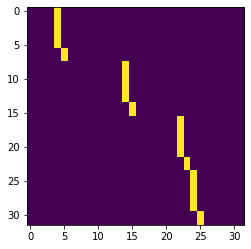

In [23]:
mat_micro = np.zeros((2**5,2**5))
mat_micro[0][4] = 1
mat_micro[1][4] = 1
mat_micro[2][4] = 1
mat_micro[3][4] = 1
mat_micro[4][4] = 1
mat_micro[5][4] = 1
mat_micro[6][5] = 1
mat_micro[7][5] = 1

mat_micro[8][14] = 1
mat_micro[9][14] = 1
mat_micro[10][14] = 1
mat_micro[11][14] = 1
mat_micro[12][14] = 1
mat_micro[13][14] = 1
mat_micro[14][15] = 1
mat_micro[15][15] = 1

mat_micro[16][22] = 1
mat_micro[17][22] = 1
mat_micro[18][22] = 1
mat_micro[19][22] = 1
mat_micro[20][22] = 1
mat_micro[21][22] = 1
mat_micro[22][23] = 1
mat_micro[23][23] = 1

mat_micro[24][24] = 1
mat_micro[25][24] = 1
mat_micro[26][24] = 1
mat_micro[27][24] = 1
mat_micro[28][24] = 1
mat_micro[29][24] = 1
mat_micro[30][25] = 1
mat_micro[31][25] = 1

states = ["".join(x) for x in product(["0","1"], repeat=int(np.log2(mat_micro.shape[0])))]

plt.imshow(mat_micro)

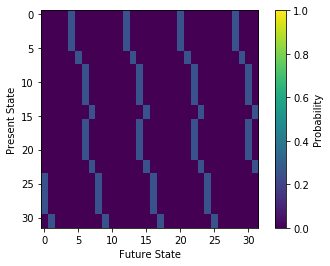

In [24]:
for i in range(mat_micro.shape[0]):
    possible_states = ([int(x,2) for x in states if x[2:] == states[np.where(mat_micro[i] == 1)[0][0]][2:]])
    mat_micro[i][possible_states] = 0.25
    
plt.imshow(mat_micro, vmin=0, vmax=1)
plt.ylabel("Present State")
plt.xlabel("Future State")
plt.colorbar(label="Probability")

In [25]:
pi = equilibrium_dist(mat_micro)
print(pi)
print("")
Dist_micro = dit_dist(pi, mat_micro)

[0.03125 0.03125 0.      0.      0.03125 0.03125 0.0625  0.0625  0.03125
 0.03125 0.      0.      0.03125 0.03125 0.0625  0.0625  0.03125 0.03125
 0.      0.      0.03125 0.03125 0.0625  0.0625  0.03125 0.03125 0.
 0.      0.03125 0.03125 0.0625  0.0625 ]



In [27]:
print(tpm_temporal_MI(pi, mat_micro))

2.499999999999999


In [33]:
imin_micro = PID_WB(Dist_micro)
micro_lattice_order, micro_pid_results = pid_dicts(imin_micro)

bundle = np.array([micro_lattice_order, micro_pid_results], dtype="object")
np.savez_compressed("XOR_micro_PID_dicts.npz", bundle)

lattice = imin_micro._lattice._lattice
node_tups = sorted(lattice)
node_strs = [(''.join('{{{}}}'.format(':'.join(map(str, n))) for n in node)) for node in sorted(lattice.nodes)]

mapping = {node_tups[i] : node_strs[i] for i in range(len(node_tups))}
xor_micro_lattice = nx.relabel_nodes(lattice, mapping)

nx.write_edgelist(xor_micro_lattice,"XOR_micro_lattice.edgelist")
# Macro-State Boolean Network

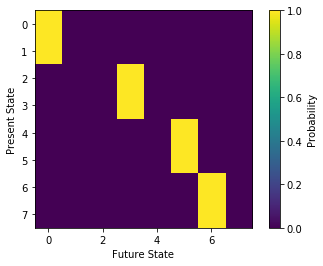

In [28]:
mat_macro = np.zeros((8,8))
mat_macro[0][0] = 1 #000 -> 000
mat_macro[1][0] = 1 #001 -> 000

mat_macro[2][3] = 1 #010 -> 011
mat_macro[3][3] = 1 #011 -> 011

mat_macro[4][5] = 1 #100 -> 101
mat_macro[5][5] = 1 #101 -> 101

mat_macro[6][6] = 1 #110 -> 110
mat_macro[7][6] = 1 #111 -> 110

plt.imshow(mat_macro)
plt.ylabel("Present State")
plt.xlabel("Future State")
plt.colorbar(label="Probability")

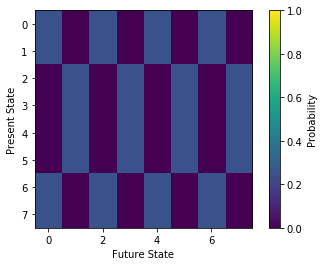

In [29]:
macro_states = ["000","001","010","011","100","101","110","111"]
for i in range(mat_macro.shape[0]):
    possible_states = ([int(x,2) for x in macro_states if x[2:] == macro_states[np.where(mat_macro[i] == 1)[0][0]][2:]])
    mat_macro[i][possible_states] = 0.25
    
plt.imshow(mat_macro, vmin=0, vmax=1)
plt.ylabel("Present State")
plt.xlabel("Future State")
plt.colorbar(label="Probability")

In [30]:
pi_macro = pi = equilibrium_dist(mat_macro)
print(pi_macro)
print("")
Dist_macro = dit_dist(pi_macro, mat_macro)
print(Dist_macro)
print("")

[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]

Class:          Distribution
Alphabet:       (('0', '1'), ('0', '1'), ('0', '1'), ('0', '1', '2', '3', '4', '5', '6', '7'))
Base:           linear
Outcome Class:  str
Outcome Length: 4
RV Names:       None

x      p(x)
0000   0.03125000000000001
0002   0.03125000000000001
0004   0.03125000000000001
0006   0.03125000000000001
0010   0.031249999999999997
0012   0.031249999999999997
0014   0.031249999999999997
0016   0.031249999999999997
0101   0.031249999999999993
0103   0.031249999999999993
0105   0.031249999999999993
0107   0.031249999999999993
0111   0.03125000000000002
0113   0.03125000000000002
0115   0.03125000000000002
0117   0.03125000000000002
1001   0.03125000000000001
1003   0.03125000000000001
1005   0.03125000000000001
1007   0.03125000000000001
1011   0.03125000000000002
1013   0.03125000000000002
1015   0.03125000000000002
1017   0.03125000000000002
1100   0.03124999999999998
1102   0.03124999999999998
1104   0.03124999999

In [32]:
print(tpm_temporal_MI(pi_macro, mat_macro))

0.9999999999999991


In [17]:
imin_macro = PID_WB(Dist_macro)
print(imin_macro)

+-----------------+--------+--------+
|      I_min      |  I_r   |   pi   |
+-----------------+--------+--------+
|     {0:1:2}     | 1.0000 | 0.0000 |
|      {0:1}      | 1.0000 | 1.0000 |
|      {0:2}      | 0.0000 | 0.0000 |
|      {1:2}      | 0.0000 | 0.0000 |
|    {0:1}{0:2}   | 0.0000 | 0.0000 |
|    {0:1}{1:2}   | 0.0000 | 0.0000 |
|    {0:2}{1:2}   | 0.0000 | 0.0000 |
| {0:1}{0:2}{1:2} | 0.0000 | 0.0000 |
|       {0}       | 0.0000 | 0.0000 |
|       {1}       | 0.0000 | 0.0000 |
|       {2}       | 0.0000 | 0.0000 |
|     {0}{1:2}    | 0.0000 | 0.0000 |
|     {1}{0:2}    | 0.0000 | 0.0000 |
|     {2}{0:1}    | 0.0000 | 0.0000 |
|      {0}{1}     | 0.0000 | 0.0000 |
|      {0}{2}     | 0.0000 | 0.0000 |
|      {1}{2}     | 0.0000 | 0.0000 |
|    {0}{1}{2}    | 0.0000 | 0.0000 |
+-----------------+--------+--------+


In [18]:
macro_lattice_order, macro_pid_results = pid_dicts(imin_macro)

bundle = np.array([macro_lattice_order, macro_pid_results], dtype="object")
np.savez_compressed("XOR_macro_PID_dicts.npz", bundle)

lattice = imin_macro._lattice._lattice
node_tups = sorted(lattice)
node_strs = [(''.join('{{{}}}'.format(':'.join(map(str, n))) for n in node)) for node in sorted(lattice.nodes)]

mapping = {node_tups[i] : node_strs[i] for i in range(len(node_tups))}
xor_macro_lattice = nx.relabel_nodes(lattice, mapping)

nx.write_edgelist(xor_macro_lattice,"XOR_macro_lattice.edgelist")